In [111]:
import numpy as np
import pandas as pd

In [113]:
encodings = ['utf-8', 'latin1', 'ISO-88591', 'cp1252']
file_path = 'spam.csv'
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"File successfully read with encoding: {encoding}")
        break
    except UnicodeError:
        print(f"Failed to red with encoding: {encoding}")
        continue

if 'df' in locals():
    print("CSV file has been successfully loaded")
else:
    print("All encoding attemps failed, unable to load CSV file")


Failed to red with encoding: utf-8
File successfully read with encoding: latin1
CSV file has been successfully loaded


In [115]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3047,ham,Die... Now i have e toot fringe again...,NaN,NaN,NaN
4674,spam,"Hi babe its Chloe, how r u? I was smashed on s...",NaN,NaN,NaN
3325,ham,Huh so fast... Dat means u havent finished pai...,NaN,NaN,NaN
2030,ham,"Ugh y can't u just apologize, admit u were wro...",NaN,NaN,NaN
3241,ham,Good Morning my Dear........... Have a great &...,NaN,NaN,NaN


In [117]:
df.shape

(5572, 5)

In [119]:
#data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [121]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace= True)
df.sample(5)

,v1,v2
3595,ham,Good morning princess! Happy New Year!
2169,spam,"Shop till u Drop, IS IT YOU, either 10K, 5K, å..."
4061,ham,Hi dear we saw dear. We both are happy. Where ...
5066,spam,83039 62735=å£450 UK Break AccommodationVouche...
617,ham,For my family happiness..


In [123]:
#renaming columns
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)
df.sample(5)

,target,text
2054,ham,Y so late but i need to go n get da laptop...
2652,ham,No need for the drug anymore.
2338,ham,"Alright, see you in a bit"
92,ham,Smile in Pleasure Smile in Pain Smile when tro...
2349,ham,Yar else i'll thk of all sorts of funny things.


In [125]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [127]:
df['target'] = encoder.fit_transform(df['target'])

In [129]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [131]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [133]:
df.duplicated().sum()

403

In [135]:
df = df.drop_duplicates(keep= 'first')

In [137]:
df.duplicated().sum()

0

In [139]:
df.shape

(5169, 2)

In [141]:
#EDA (exploratory data analysis)
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [143]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

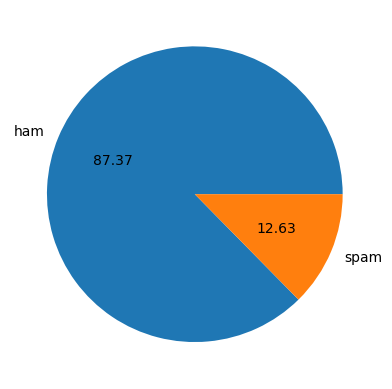

In [145]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [147]:
#big chunk of ham n very less spam, our data is imbalance 
import nltk

In [149]:
!pip install nltk

In [150]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vasud\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [151]:
df['num_characters']= df['text'].apply(len)

In [152]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [157]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [159]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [161]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [163]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [165]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [167]:
#target ham
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [169]:
#target spam
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [171]:
import seaborn as sns

C:\Users\vasud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vasud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

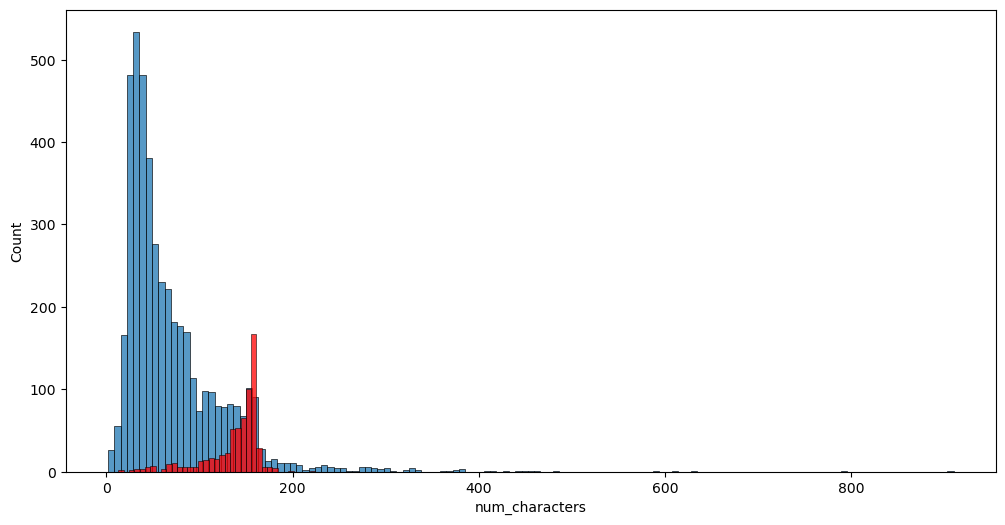

In [179]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

C:\Users\vasud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vasud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

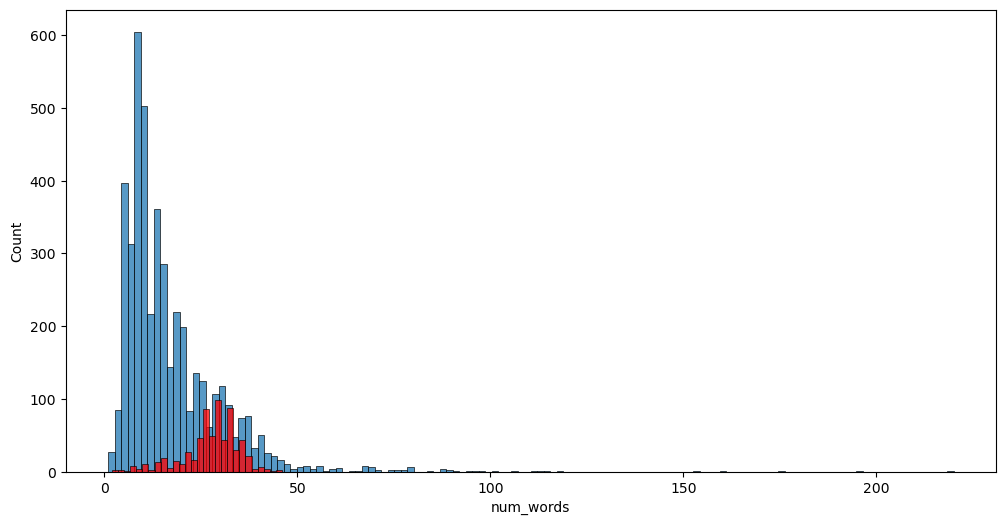

In [181]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

C:\Users\vasud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vasud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vasud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


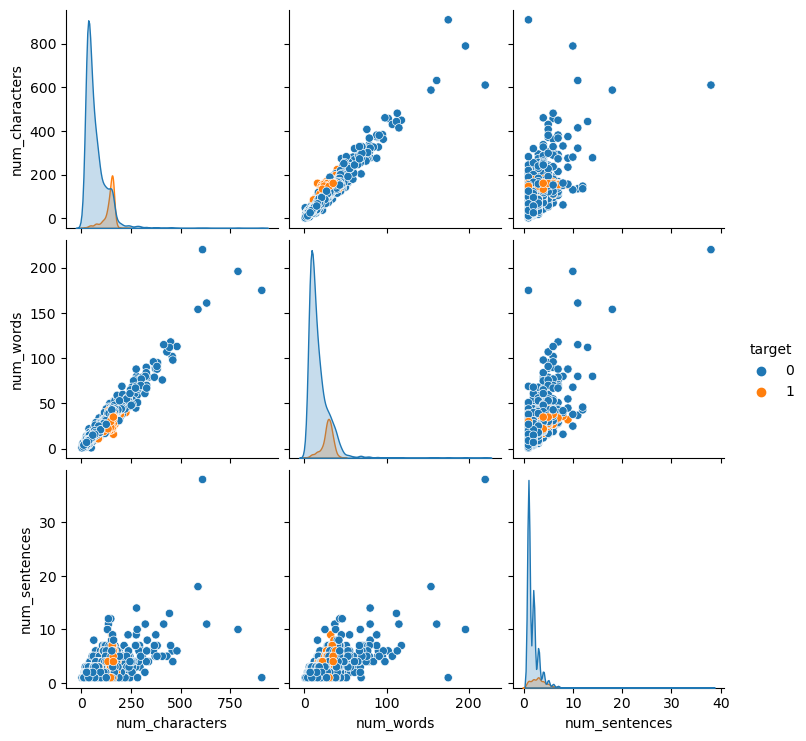

In [183]:
sns.pairplot(df, hue='target')

In [203]:
#Data processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
import string

nltk.download( 'stopwords') # You may need to download the stopwords dataset

ps = PorterStemmer()

def transform_text(text):
    text = text. lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y. clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y. append(i)
    text = y[:]
    y. clear()
    
    for i in text:
        y.append(ps. stem(i))
        
    return " ".join(y)
transformed_text= transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today")
print(transformed_text)

gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vasud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [205]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [209]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('loving')

'love'

In [211]:
df['transformed_text']=df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [233]:
!pip install wordcloud

In [234]:
from wordcloud import WordCloud
wc= WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [239]:
spam_wc =wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

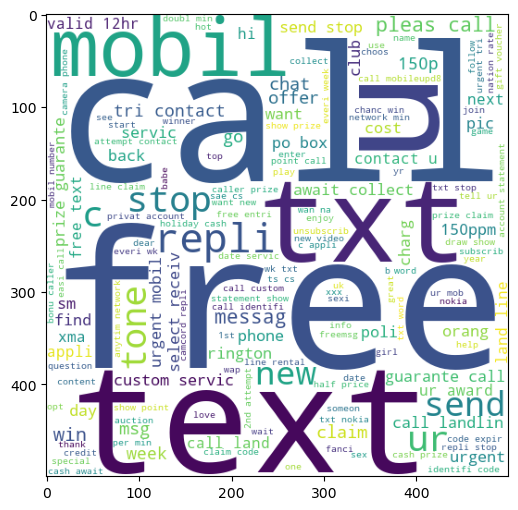

In [241]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [243]:
ham_wc =wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

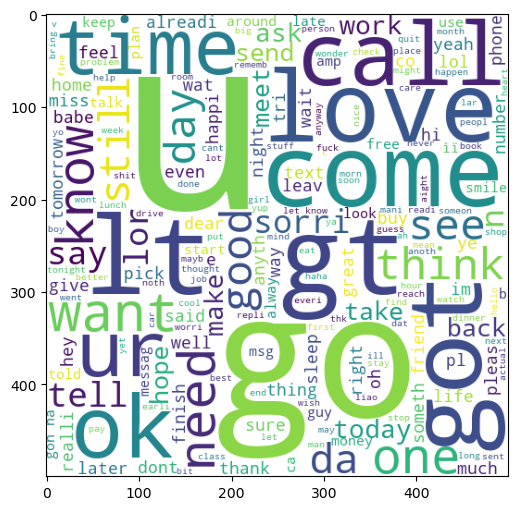

In [245]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [247]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [249]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [253]:
len(spam_corpus)

9939

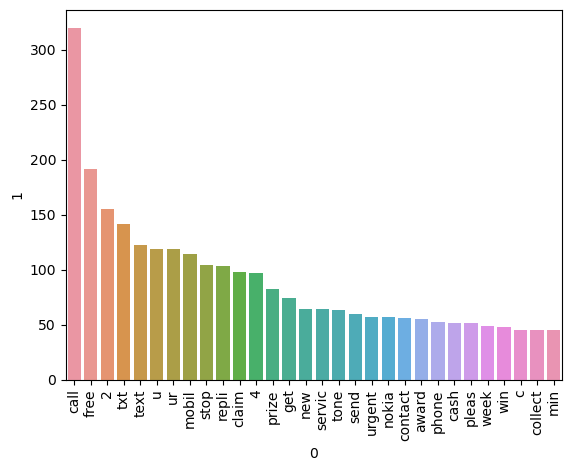

In [261]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [263]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [265]:
len(ham_corpus)

35404

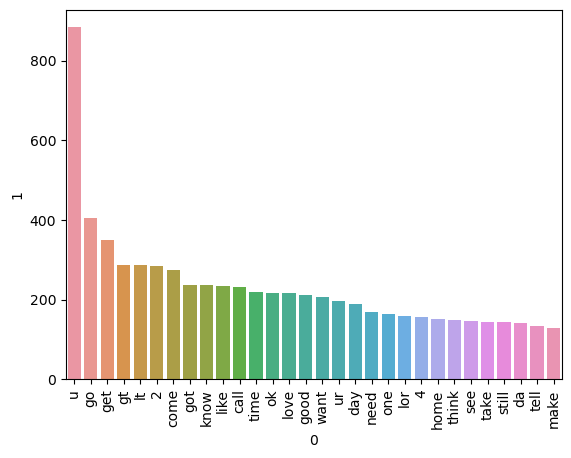

In [269]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [271]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [273]:
#building the model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)

In [277]:
X= tfidf.fit_transform(df['transformed_text']).toarray()

In [279]:
X.shape

(5169, 3000)

In [281]:
y=df['target'].values

In [283]:
from sklearn.model_selection import train_test_split

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [291]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score


In [293]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [297]:
gnb.fit(X_train, y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [301]:
mnb.fit(X_train, y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [303]:
bnb.fit(X_train, y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [307]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 262.6 kB/s eta 0:07:56
   ---------------------------------------- 0.0/124.9 MB 262.6 kB/s eta 0:07:56
   ---------------------------------------- 0.1/124.9 MB 456.6 kB/s eta 0:04:34
   ---------------------------------------- 0.1/124.9 MB 456.6 kB/s eta 0:04:34
   ---------------------------------------- 0.1/124.9 MB 532.5 kB/s eta 0:03:55
   ---------------------------------------- 0.1/124.9 MB 532.5 kB/s eta 0:03:55
   ---------------------------------------- 0.2/124.9 MB 655.6 kB/s eta 0:03:11
   ---------------------------------------- 0.2/124.9 MB 578.7 kB/s eta 0:03:36
   ---------------------------------------- 0.4/124.9 MB 794.9 kB/s eta 0:02:37
   ---------------------------------------- 0.4/124.9 MB 757.8 kB/s eta 0:02:45
   ---------------------------------------- 0.5/124.9 MB 8

In [311]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [317]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc= KNeighborsClassifier()
mnb= MultinomialNB()
dtc= DecisionTreeClassifier(max_depth=5)
lrc= LogisticRegression(solver='liblinear', penalty='l1')
rfc= RandomForestClassifier(n_estimators=50, random_state=2)
abc= AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [319]:
clfs={
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [321]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    precision= precision_score(y_test, y_pred)
    return accuracy, precision

In [323]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [325]:
accuracy_scores =[]
precision_scores= []
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy:  0.9758220502901354
Precision:  0.9747899159663865
For KN
Accuracy:  0.9052224371373307
Precision:  1.0
For NB
Accuracy:  0.9709864603481625
Precision:  1.0
For DT
Accuracy:  0.9294003868471954
Precision:  0.8282828282828283
For LR
Accuracy:  0.9584139264990329
Precision:  0.9702970297029703
For RF
Accuracy:  0.9758220502901354
Precision:  0.9829059829059829
For AdaBoost
Accuracy:  0.960348162475822
Precision:  0.9292035398230089
For BgC
Accuracy:  0.9584139264990329
Precision:  0.8682170542635659
For ETC
Accuracy:  0.9748549323017408
Precision:  0.9745762711864406
For GBDT
Accuracy:  0.9468085106382979
Precision:  0.9191919191919192
For xgb
Accuracy:  0.9671179883945842
Precision:  0.9262295081967213


In [333]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_valuesperformance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

C:\Users\vasud\AppData\Local\Temp\ipykernel_9900\854780352.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  performance_df = pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_valuesperformance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)


In [335]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [337]:
performance_df1= pd.melt(performance_df, id_vars ="Algorithm")

In [339]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


In [343]:
#voting classifier
svc= SVC(kernel='sigmoid', gamma=1.0, probability= True)
mnb= MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier

In [345]:
voting =VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

In [347]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [349]:
y_pred= voting.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [351]:
#applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator= RandomForestClassifier()

In [353]:
from sklearn.ensemble import StackingClassifier

In [355]:
clf= StackingClassifier(estimators=estimators, final_estimator= final_estimator)

In [360]:
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


In [363]:
import pickle
pickle.dump(tfidf,open('Vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))       

In [369]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

#sample text data and corresponding labels
X_train= ["Sample text 1","Sample text 2","Sample text 3"]
y_train= [0,1,0] #Example labels 

#create and train the TF-IDF vectorizer
tfidf= TfidfVectorizer(lowercase=True, stop_words="english")
X_train_tfidf= tfidf.fit_transform(X_train)

#create and train the naive bayes classifier
mnb= MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

#save the trained TF-IDF vectorizer and Naive Bayes model to files
with open('vectorizer.pkl', 'wb') as vectorizer_file:
     pickle.dump(tfidf, vectorizer_file)

with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)